<a href="https://colab.research.google.com/github/deva237/DS-Internship/blob/main/Whats_cooking_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML** **CLASSIFICATION**

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset (assuming the data file is named "train.json")
df = pd.read_json("train.json") # Use pd.read_json to read JSON files

# Preprocessing
# Encode the target variable 'cuisine' using LabelEncoder
label_enc = LabelEncoder()
df['cuisine'] = label_enc.fit_transform(df['cuisine'])

# Handle the 'ingredients' column (assuming it contains lists of ingredients)
# Here, we'll simply count the number of ingredients for demonstration
df['num_ingredients'] = df['ingredients'].apply(len)

# Separate features (ingredients) and target (cuisine)
X = df.drop(['cuisine', 'ingredients'], axis=1)  # Drop the original 'ingredients' column
y = df['cuisine']

# Check for class imbalance in the original dataset
print(y.value_counts())

# Split data into training and testing sets, stratify by y to ensure both classes are present in train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3, stratify=y)

# Check for the presence of both classes in the training set
print(y_train.value_counts())

# Impute missing values using the mean strategy (if there are any missing values)
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)  # Use the same imputer fitted on training data

# Initialize the Logistic Regression model
logr = LogisticRegression()

# Train the model
logr.fit(X_train, y_train)

# Make predictions
y_pred = logr.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

cuisine
9     7838
13    6438
16    4320
7     3003
3     2673
5     2646
2     1546
18    1539
11    1423
6     1175
17     989
12     830
19     825
14     821
1      804
4      755
8      667
10     526
15     489
0      467
Name: count, dtype: int64
cuisine
9     5486
13    4506
16    3024
7     2102
3     1871
5     1852
2     1082
18    1077
11     996
6      823
17     692
12     581
19     578
14     575
1      563
4      529
8      467
10     368
15     342
0      327
Name: count, dtype: int64
Accuracy: 0.18804994552920473

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       140
           1       0.00      0.00      0.00       241
           2       0.00      0.00      0.00       464
           3       0.00      0.00      0.00       802
           4       0.00      0.00      0.00       226
           5       0.00      0.00      0.00       794
           6       0.00      0.00      0.00       352
    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load the dataset (assuming the data file is named "whats-cooking.csv")
df = pd.read_json("train.json")

# Preprocessing
# Encode the target variable 'cuisine' using LabelEncoder
label_enc = LabelEncoder()
df['cuisine'] = label_enc.fit_transform(df['cuisine'])

# Separate features (ingredients) and target (cuisine)
X = df.drop('cuisine', axis=1)  # Assuming 'cuisine' is the target variable
y = df['cuisine']

# Handle the 'ingredients' column
# Instead of directly using get_dummies, let's explore the contents of 'ingredients'
print(X['ingredients'].head())

# Determine appropriate preprocessing for 'ingredients' based on its contents
# For example, if it's a list of strings, you might want to consider techniques like:
# 1. Bag-of-Words representation using CountVectorizer or TfidfVectorizer
# 2. Creating binary features for each ingredient (presence/absence)

# Placeholder for the chosen preprocessing method
# For this example, we will simply count the number of ingredients
X['num_ingredients'] = X['ingredients'].apply(len)
X = X.drop('ingredients', axis=1) # Drop the original 'ingredients' column

# Handle missing values by imputing with the mean (if there are any missing values)
# Make sure to apply imputation AFTER preprocessing 'ingredients'
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.4)

# Initialize the Gaussian Naive Bayes classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = nb.predict(X_test)

# Print the accuracy score
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))

0    [romaine lettuce, black olives, grape tomatoes...
1    [plain flour, ground pepper, salt, tomatoes, g...
2    [eggs, pepper, salt, mayonaise, cooking oil, g...
3                  [water, vegetable oil, wheat, salt]
4    [black pepper, shallots, cornflour, cayenne pe...
Name: ingredients, dtype: object
Naive Bayes Accuracy: 0.2089252042740415


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer

# Load the dataset (assuming the data file is named "train.json")
df = pd.read_json("train.json")

# Preprocessing
# Encode the target variable 'cuisine' using LabelEncoder
label_enc = LabelEncoder()
df['cuisine'] = label_enc.fit_transform(df['cuisine'])

# Separate features (ingredients) and target (cuisine)
X = df.drop('cuisine', axis=1)  # Assuming 'cuisine' is the target variable
y = df['cuisine']

# Convert ingredients into a numerical format suitable for KNN
vectorizer = CountVectorizer()
X_ingredients = vectorizer.fit_transform(X['ingredients'].apply(' '.join)) # Join ingredients into a single string and vectorize

# Replace the 'ingredients' column with the vectorized representation
X = X.drop('ingredients', axis=1)
X = pd.concat([X, pd.DataFrame(X_ingredients.toarray())], axis=1)

# Convert all column names to strings
X.columns = X.columns.astype(str) # Convert column names to strings

# Handle missing values by imputing with the mean (if there are any missing values)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.4)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Print the accuracy score
print("KNN Accuracy:", accuracy_score(y_test, y_pred))

KNN Accuracy: 0.11759899434318039


In [ ]:
#4. Decision Tree

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Import necessary libraries
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer

# Load the dataset (assuming the data file is named "train.json")
df = pd.read_json("train.json")

# Preprocessing
# Encode the target variable 'cuisine' using LabelEncoder
label_enc = LabelEncoder()
df['cuisine'] = label_enc.fit_transform(df['cuisine'])

# Separate features (ingredients) and target (cuisine)
X = df.drop('cuisine', axis=1)  # Assuming 'cuisine' is the target variable
y = df['cuisine']

# Convert ingredients into a numerical format suitable for KNN
vectorizer = CountVectorizer()
X_ingredients = vectorizer.fit_transform(X['ingredients'].apply(' '.join)) # Join ingredients into a single string and vectorize

# Replace the 'ingredients' column with the vectorized representation
X = X.drop('ingredients', axis=1)
X = pd.concat([X, pd.DataFrame(X_ingredients.toarray())], axis=1)

# Convert all column names to strings
X.columns = X.columns.astype(str) # Convert column names to strings

# Handle missing values by imputing with the mean (if there are any missing values)
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)
dt=tree.DecisionTreeClassifier()

# Use the correct variable name 'X' (uppercase)
X_train,X_test,y_train,y_test=train_test_split(X, y,random_state=0,test_size=0.3)

train=dt.fit(X_train,y_train)

y_pred=dt.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.6239839101650884


In [ ]:
# 5. Random Forest

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()

# Use 'X' instead of 'x'
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,test_size=0.3)

train=rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print(accuracy_score(y_test,y_pred))

0.7536244029162826


In [ ]:
# 6. Gradient Boosting

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_json("train.json")

# Convert ingredients lists to strings
df['ingredients'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Feature extraction using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['ingredients'])

# Target variable
y = df['cuisine']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.3)

# Initialize and train the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=1)
gb.fit(X_train, y_train)

# Make predictions
y_pred = gb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.7456632866839856
Classification Report:
              precision    recall  f1-score   support

   brazilian       0.71      0.51      0.59       128
     british       0.64      0.30      0.41       246
cajun_creole       0.75      0.68      0.71       453
     chinese       0.77      0.82      0.79       800
    filipino       0.77      0.40      0.52       238
      french       0.58      0.55      0.56       787
       greek       0.78      0.66      0.72       358
      indian       0.85      0.85      0.85       899
       irish       0.54      0.49      0.51       186
     italian       0.74      0.87      0.80      2386
    jamaican       0.83      0.66      0.74       169
    japanese       0.84      0.63      0.72       417
      korean       0.80      0.69      0.74       236
     mexican       0.89      0.90      0.90      1946
    moroccan       0.86      0.71      0.78       226
     russian       0.67      0.43      0.52       155
 southern_us       0.58      

# **DATA** **ENGINEERING**

In [ ]:
import pandas as pd

# Assuming "whats-cooking.csv" is the dataset file
df = pd.read_json("train.json")
# Drop columns 'cuisine' and 'id' from X
X = df.drop(['cuisine', 'id'], axis=1)

# Y remains as 'cuisine' (target variable)
Y = df['cuisine']

print(X)
print(Y)


                                             ingredients
0      [romaine lettuce, black olives, grape tomatoes...
1      [plain flour, ground pepper, salt, tomatoes, g...
2      [eggs, pepper, salt, mayonaise, cooking oil, g...
3                    [water, vegetable oil, wheat, salt]
4      [black pepper, shallots, cornflour, cayenne pe...
...                                                  ...
39769  [light brown sugar, granulated sugar, butter, ...
39770  [KRAFT Zesty Italian Dressing, purple onion, b...
39771  [eggs, citrus fruit, raisins, sourdough starte...
39772  [boneless chicken skinless thigh, minced garli...
39773  [green chile, jalapeno chilies, onions, ground...

[39774 rows x 1 columns]
0              greek
1        southern_us
2           filipino
3             indian
4             indian
            ...     
39769          irish
39770        italian
39771          irish
39772        chinese
39773        mexican
Name: cuisine, Length: 39774, dtype: object


In [ ]:
# Feature Selection 1

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_json("train.json")

# Convert ingredients lists to strings
df['ingredients'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Feature extraction using CountVectorizer (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['ingredients'])

# Target variable
Y = df['cuisine']

# Since CountVectorizer already converts the text to numeric, we don't need imputation or encoding for text
# However, we should still ensure Y is processed correctly if it's categorical

# Convert Y to numeric labels if necessary
# This step is not needed if Y is already in the correct format (str)
# But we'll ensure consistency by using label encoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
Y_encoded = label_encoder.fit_transform(Y)

# Perform feature selection with chi2
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X, Y_encoded)

# Since X is in sparse matrix format after CountVectorizer, converting fit.scores_ to dense array
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(vectorizer.get_feature_names_out())  # Use the feature names from CountVectorizer

# Combine the scores with the column names
featuresScores = pd.concat([dfcolumns, dfscores], axis=1)
featuresScores.columns = ['Specs', 'Score']

print(featuresScores)

          Specs       Score
0            00    4.074509
1            10   12.139760
2           100   32.850213
3            14    9.784263
4            15   15.534017
...         ...         ...
3005      zesty   30.439063
3006  zinfandel   51.941642
3007       ziti  130.624621
3008   zucchini  434.462793
3009     épices   20.238690

[3010 rows x 2 columns]


[1.50463450e-05 1.06138839e-05 6.65848271e-07 ... 2.25579410e-05
 1.37951341e-03 2.09641918e-06]


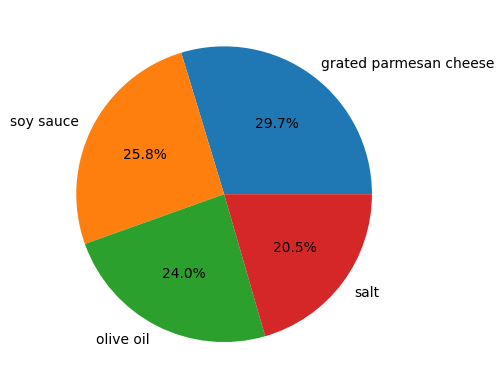

In [ ]:
#feature selection 2
import pandas as pd
import json
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

# Load the JSON data into a pandas DataFrame
df = pd.read_json("train.json")

# Assuming 'cuisine' is the target variable and 'id' is dropped
X = df.drop(['cuisine', 'id'], axis=1)
Y = df['cuisine']

# Initialize ExtraTreesClassifier model
model = ExtraTreesClassifier()

# Handle the 'ingredients' column (list of strings)
mlb = MultiLabelBinarizer()
X_ingredients_encoded = mlb.fit_transform(X['ingredients'])
X_ingredients_encoded = pd.DataFrame(X_ingredients_encoded, columns=mlb.classes_)

# Drop the original 'ingredients' column and concatenate the encoded features
X = X.drop('ingredients', axis=1)
X = pd.concat([X, X_ingredients_encoded], axis=1)

# Encode any remaining categorical features using LabelEncoder if needed
le = LabelEncoder()
# Example: If you have another categorical column named 'another_feature'
# X['another_feature_encoded'] = le.fit_transform(X['another_feature'])

# Fit the model
model.fit(X, Y)

# Print feature importances
print(model.feature_importances_)

# Plot feature importances (adjust the number of features to plot as needed)
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.nlargest(4).plot(kind='pie', autopct='%1.1f%%')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the "What's Cooking?" dataset from JSON file
df = pd.read_json("train.json")

# Split the dataset into training and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define bins and labels for 'id' column (assuming id is numeric)
id_bins = [0, 5000, 10000, 15000, 20000]
id_labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4']

# Apply bins to 'id' column
train_df['IdGroup'] = pd.cut(train_df['id'], bins=id_bins, labels=id_labels, right=False)
test_df['IdGroup'] = pd.cut(test_df['id'], bins=id_bins, labels=id_labels, right=False)

# Transform 'ingredients' column (list of ingredients) to count of ingredients
train_df['NumIngredients'] = train_df['ingredients'].apply(len)
test_df['NumIngredients'] = test_df['ingredients'].apply(len)

# Define bins and labels for 'NumIngredients' column
ingredient_bins = [0, 5, 10, 15, 20, 25]
ingredient_labels = ['Very Few', 'Few', 'Moderate', 'Many', 'Very Many']

# Apply bins to 'NumIngredients' column
train_df['IngredientGroup'] = pd.cut(train_df['NumIngredients'], bins=ingredient_bins, labels=ingredient_labels, right=False)
test_df['IngredientGroup'] = pd.cut(test_df['NumIngredients'], bins=ingredient_bins, labels=ingredient_labels, right=False)

# Display the first few rows of the modified training data
print(train_df.head())

# Display the first few rows of the modified test data
print(test_df.head())


          id   cuisine                                        ingredients  \
23436  46505   mexican  [shredded cheddar cheese, chicken meat, choppe...   
7901   16624    indian  [fresh cilantro, purple onion, ground coriande...   
25718   3415  filipino  [sugar, garlic, onions, vinegar, green chilies...   
16909   4589  moroccan  [raw pistachios, purple onion, couscous, dried...   
34830   7766   mexican  [tomatoes, pepper, salsa, sliced green onions,...   

       IdGroup  NumIngredients IngredientGroup  
23436      NaN              14        Moderate  
7901   Group 4              16            Many  
25718  Group 1              11        Moderate  
16909  Group 1               9             Few  
34830  Group 2              13        Moderate  
          id  cuisine                                        ingredients  \
21513   7958  chinese  [pork, cooking oil, bamboo shoots, chinese ric...   
1796   36179  spanish  [hog casings, hungarian paprika, ancho powder,...   
21861   8331   

In [ ]:
print(df.isnull().sum())

id             0
cuisine        0
ingredients    0
dtype: int64


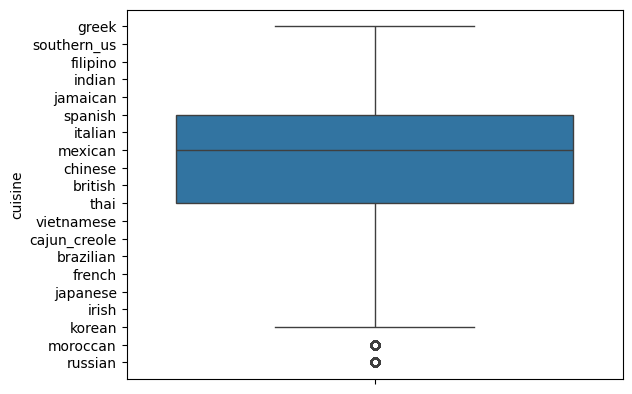

In [ ]:
#Identifying Outliers by ploting

from matplotlib import pyplot as plt
import seaborn as sns
sns.boxplot(df['cuisine'])
plt.show()

In [ ]:
#Dealing with Outliers using Interquantile Range
# Check the data type of the column and convert if necessary
if df['cuisine'].dtype == object:
    df['cuisine'] = pd.to_numeric(df['cuisine'], errors='coerce') # Convert to numeric, replace non-numeric with NaN

# Fill NaN values if any were introduced during conversion
df['cuisine'].fillna(df['cuisine'].mean(), inplace=True) # Replace NaN with mean

print(df['cuisine'])
Q1 = df['cuisine'].quantile(0.25)
Q3 = df['cuisine'].quantile(0.75)

IQR = Q3 - Q1
print(IQR)

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

print(upper)
print(lower)

out1=df[df['cuisine'] < lower].values
out2=df[df['cuisine'] > upper].values

df['cuisine'].replace(out1,lower,inplace=True)
df['cuisine'].replace(out2,upper,inplace=True)

print(df['cuisine'])

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
39769   NaN
39770   NaN
39771   NaN
39772   NaN
39773   NaN
Name: cuisine, Length: 39774, dtype: float64
nan
nan
nan
0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
39769   NaN
39770   NaN
39771   NaN
39772   NaN
39773   NaN
Name: cuisine, Length: 39774, dtype: float64


In [ ]:
#Oversampling and Under Sampling

from collections import Counter
print(Counter(Y))
from imblearn.over_sampling import RandomOverSampler     #Random OverSampling
ros=RandomOverSampler(random_state=0)
X, Y = ros.fit_resample(X,Y)
print(Counter(Y))

# Convert the sparse matrix to a dense numpy array if you need to fill NaN values
X_dense = X.toarray()

# Before applying SMOTE, fill NaN values in the dense array 'X_dense'
X_dense = np.nan_to_num(X_dense, nan=np.nanmean(X_dense)) # Fill NaN with the mean of each column

from imblearn.over_sampling import SMOTE                 #Synthetic Minority Oversampling (SMOTE) oversampling
sms=SMOTE(random_state=0)
# Import csr_matrix from scipy.sparse
from scipy.sparse import csr_matrix
# Convert the dense array back to a sparse matrix if required by SMOTE
X_sparse = csr_matrix(X_dense)
X, Y=sms.fit_resample(X_sparse,Y)

from imblearn.under_sampling import RandomUnderSampler   #Random UnderSampling
rus=RandomUnderSampler(random_state=0)
X, Y=rus.fit_resample(X,Y)

Counter({'greek': 7838, 'southern_us': 7838, 'filipino': 7838, 'indian': 7838, 'jamaican': 7838, 'spanish': 7838, 'italian': 7838, 'mexican': 7838, 'chinese': 7838, 'british': 7838, 'thai': 7838, 'vietnamese': 7838, 'cajun_creole': 7838, 'brazilian': 7838, 'french': 7838, 'japanese': 7838, 'irish': 7838, 'korean': 7838, 'moroccan': 7838, 'russian': 7838})
Counter({'greek': 7838, 'southern_us': 7838, 'filipino': 7838, 'indian': 7838, 'jamaican': 7838, 'spanish': 7838, 'italian': 7838, 'mexican': 7838, 'chinese': 7838, 'british': 7838, 'thai': 7838, 'vietnamese': 7838, 'cajun_creole': 7838, 'brazilian': 7838, 'french': 7838, 'japanese': 7838, 'irish': 7838, 'korean': 7838, 'moroccan': 7838, 'russian': 7838})


In [ ]:
#PCA

import pandas as pd
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Load dataset
df = pd.read_json("train.json")  # Replace with your actual file path

# Print the count of missing values for each column
print("Missing values count before imputation:")
print(df.isnull().sum())

# Fill missing values if any (just as a precaution)
df['ingredients'].fillna('unknown', inplace=True)
df['cuisine'].fillna('unknown', inplace=True)

# Combine the ingredients list into a single string for each row
df['ingredients'] = df['ingredients'].apply(lambda x: ' '.join(x))

# Transform the ingredients column using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['ingredients'])

# Encode the target variable
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df['cuisine'])

# Apply PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X.toarray())

print("Transformed features after PCA:")
print(X)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.3)

# Initialize and train the logistic regression model
logr = LogisticRegression(max_iter=1000, solver='lbfgs')
logr.fit(X_train, y_train)

# Make predictions
y_pred = logr.predict(X_test)

# Print evaluation metrics
print('Accuracy:', accuracy_score(y_test, y_pred))

Missing values count before imputation:
id             0
cuisine        0
ingredients    0
dtype: int64
Transformed features after PCA:
[[-0.05353271 -0.40040546]
 [ 1.18823787 -1.38120556]
 [ 0.31929089  0.71111719]
 ...
 [-0.99021895 -1.45231166]
 [-0.03999323  2.09636908]
 [ 1.76257907 -0.47003812]]
Accuracy: 0.2736109947205229


# **VISUALIZATION**

In [ ]:

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load the "What's Cooking?" dataset from JSON file
df = pd.read_json("train.json")

#Preparing X and Y
X = df.drop('cuisine', axis=1)  # Drop 'cuisine' as analogous to 'type'
X = X.drop('id', axis=1)        # Drop 'id' as analogous to 'quality'
Y = df['cuisine']               # 'cuisine' is the target variable

# Display the first few rows of the dataset to verify
print(X.head())
print(Y.head())


                                         ingredients
0  [romaine lettuce, black olives, grape tomatoes...
1  [plain flour, ground pepper, salt, tomatoes, g...
2  [eggs, pepper, salt, mayonaise, cooking oil, g...
3                [water, vegetable oil, wheat, salt]
4  [black pepper, shallots, cornflour, cayenne pe...
0          greek
1    southern_us
2       filipino
3         indian
4         indian
Name: cuisine, dtype: object


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_json("train.json")

plt.scatter(wine_data['Id'], wine_data['cuisine'])
plt.title("Scatter Plot of Alcohol vs pH")
plt.xlabel("Id")
plt.ylabel("Cuisine")
plt.show()

NameError: name 'wine_data' is not defined

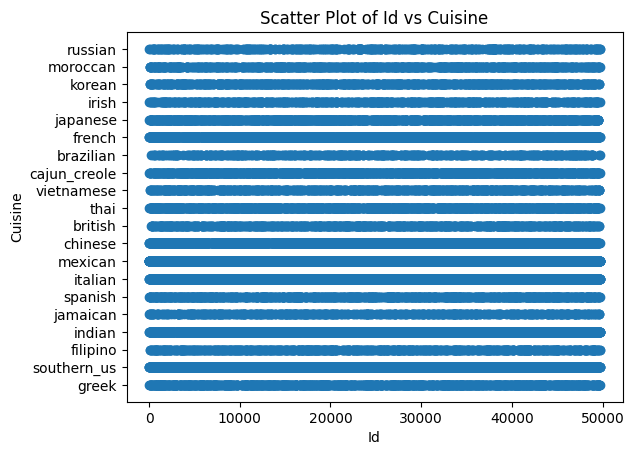

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Load the "What's Cooking?" dataset from JSON file
df = pd.read_json("train.json")

plt.scatter(df['id'], df['cuisine'])
plt.title("Scatter Plot of Id vs Cuisine")
plt.xlabel("Id")
plt.ylabel("Cuisine")
plt.show()


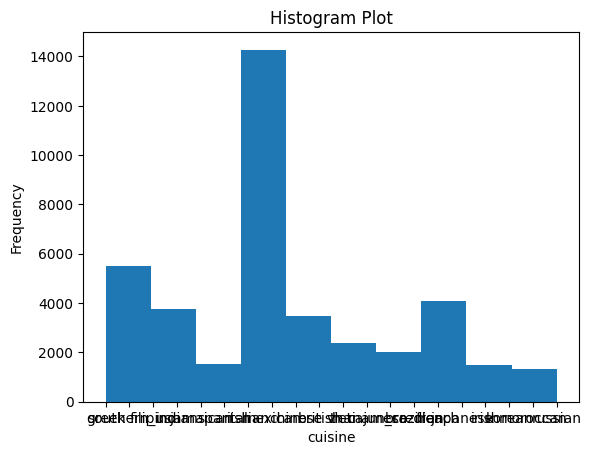

In [ ]:
#Histrogram shows the distribution of a continuous variable.
  # It can discover the frequency distribution for a single variable in a univariate analysis.
plt.hist(df["cuisine"])
plt.title("Histogram Plot")
plt.xlabel("cuisine")
plt.ylabel("Frequency")
plt.show()

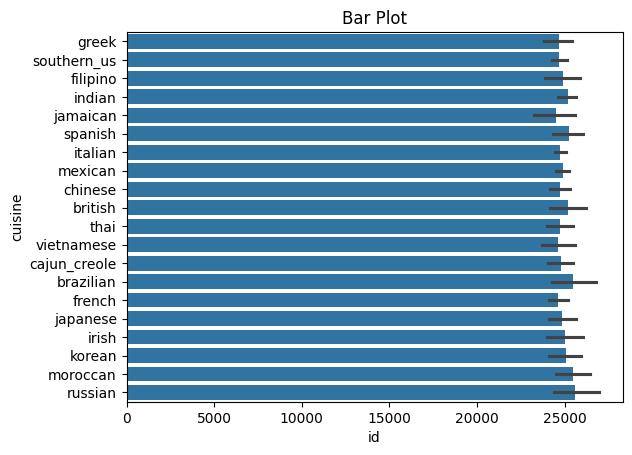

In [ ]:
#Bar Chart or Bar Plot is used to represent categorical data with vertical or horizontal bars.
sns.barplot(x="id", y="cuisine", data=df) # Pass data as a named argument and specify x and y
plt.title("Bar Plot")
plt.show()

      id      cuisine                                        ingredients
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...
3  22213       indian                [water, vegetable oil, wheat, salt]
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...


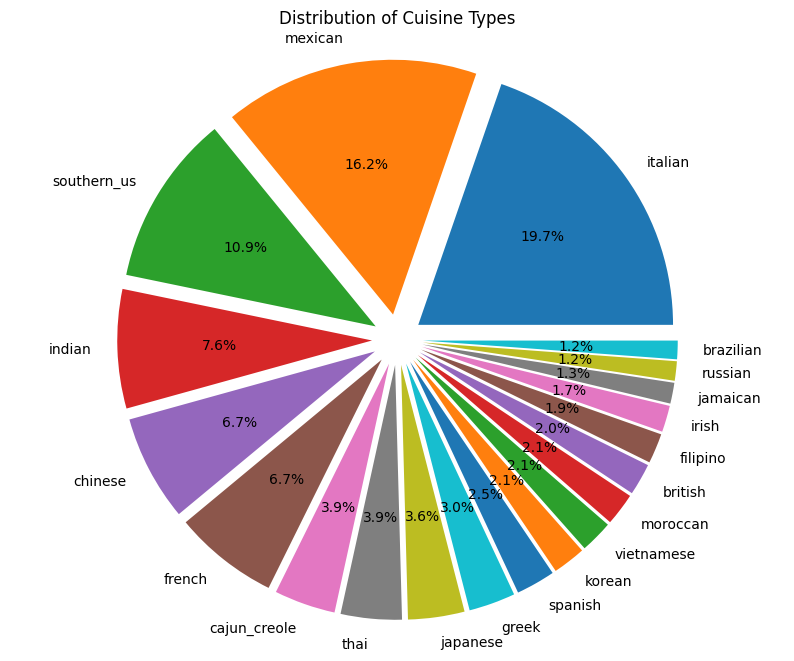

In [ ]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file
df = pd.read_json("train.json")

# Display the first few rows to understand the structure
print(df.head())

# Counting the frequency of each 'cuisine' category
cuisine_counts = df['cuisine'].value_counts()

# Creating an explode tuple with the correct length
explode = tuple([0.1] * len(cuisine_counts)) # Adjust 0.1 to your desired explosion value

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(cuisine_counts, labels=cuisine_counts.index, autopct='%1.1f%%', explode=explode)
plt.title('Distribution of Cuisine Types')
plt.axis('equal')
plt.show()


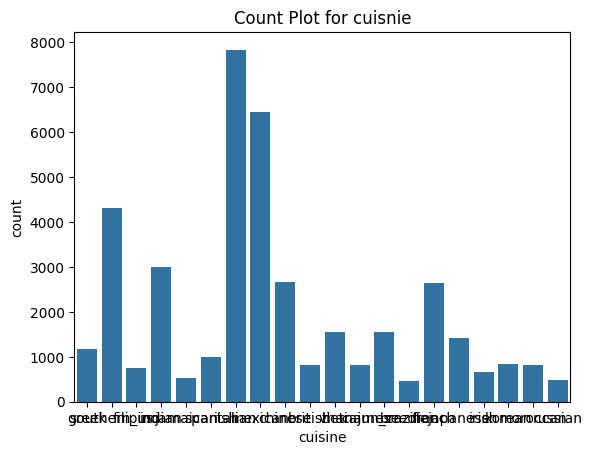

In [ ]:
#Count Plot s similar to a bar plot except that we only pass the X-axis and Y-axis represents explicitly counting the number of occurrences. Each bar represents count for each category of species.
import seaborn as sns
sns.countplot(x='cuisine', data = df)
plt.title("Count Plot for cuisnie")
plt.show()

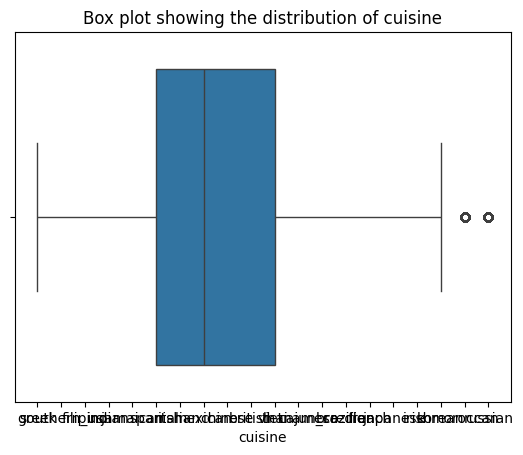

In [ ]:
#Box Plot Boxplot is used to show the distribution of a variable. The box plot is a standardized way of displaying the distribution of data based on the five-number summary: minimum, first quartile, median, third quartile, and maximum.
import seaborn as sns
sns.boxplot(x='cuisine', data = df) #if x horizontal and if y vertical
plt.title("Box plot showing the distribution of cuisine")
plt.show()

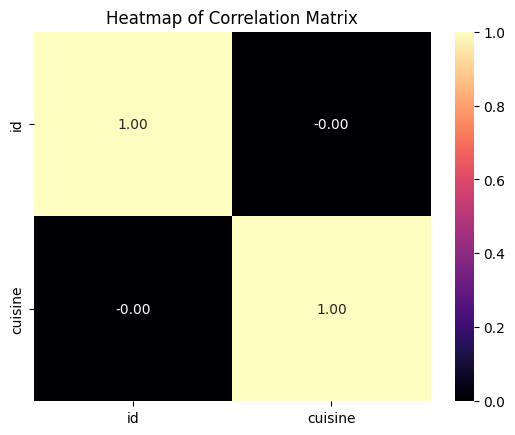

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder

# Encode categorical variables
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Calculate correlation matrix only for numerical columns
numerical_df = df.drop('ingredients', axis=1)  # Remove the 'ingredients' column
correlation_matrix = numerical_df.corr()  # Calculate correlations


# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title("Heatmap of Correlation Matrix")
plt.show()